Object Oriented programming

In [ ]:
class GeneralNeuron:
    def __init__(self, firing_rate=0.0):
        """
        Initializes a GeneralNeuron with a firing rate.
        
        :param firing_rate: Initial firing rate of the neuron
        """
        self.firing_rate = firing_rate  # Attribute: firing_rate

    def activate(self, stimulus_strength):
        """
        Receives a stimulus and calculates the firing rate based on stimulus strength.
        
        :param stimulus_strength: The strength of the received stimulus
        """
        # פונקציה לחישוב קצב הירי - לא מימוש
        pass

In [ ]:
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0.0, receptor_type=""):
        """
        Initializes a SensoryNeuron with a firing rate and receptor type.
        
        :param firing_rate: Initial firing rate of the neuron
        :param receptor_type: Type of stimulus the neuron detects
        """
        super().__init__(firing_rate)
        self.receptor_type = receptor_type  # Attribute: receptor_type

    def sense_stimulus(self, stimulus):
        """
        Processes the specific stimulus and activates the neuron based on stimulus strength or type.
        
        :param stimulus: The specific stimulus to process
        """
        # פונקציה לעיבוד גירוי - לא מימוש
        pass

In [ ]:
class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0.0, target_muscle=""):
        """
        Initializes a MotorNeuron with a firing rate and target muscle.
        
        :param firing_rate: Initial firing rate of the neuron
        :param target_muscle: The muscle controlled by the motor neuron
        """
        super().__init__(firing_rate)
        self.target_muscle = target_muscle  # Attribute: target_muscle

    def control_muscle(self):
        """
        Triggers a response in the target muscle based on the neuron's activation level.
        """
        # פונקציה לשליטה בשריר - לא מימוש
        pass

In [ ]:
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0.0):
        """
        Initializes a Photoreceptor with a fixed receptor type of 'light'.
        
        :param firing_rate: Initial firing rate of the neuron
        """
        super().__init__(firing_rate, receptor_type="light")

    def light_detection(self, light_intensity):
        """
        Receives light intensity as input and activates according to light levels.
        
        :param light_intensity: The intensity of the received light
        """
        # פונקציה לזיהוי אור -  מימוש
        self.activate(light_intensity)

    def activate(self, stimulus_strength):
        """
        Overrides the activate method to handle light-specific activation.
        
        :param stimulus_strength: The strength of the light stimulus
        """
        # Override to implement unique response to light
        # לדוגמה: self.firing_rate += stimulus_strength
        self.firing_rate += stimulus_strength

In [ ]:
class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0.0):
        """
        Initializes a Mechanoreceptor with a fixed receptor type of 'pressure'.
        
        :param firing_rate: Initial firing rate of the neuron
        """
        super().__init__(firing_rate, receptor_type="pressure")

    def pressure_detection(self, pressure_level):
        """
        Receives pressure as input and activates in response to the strength of the applied pressure.
        
        :param pressure_level: The level of applied pressure
        """
        # פונקציה לזיהוי לחץ - לא מימוש
        pass

    def activate(self, stimulus_strength):
        """
        Overrides the activate method to handle pressure-specific activation.
        
        :param stimulus_strength: The strength of the pressure stimulus
        """
        # Override to implement unique response to pressure
        # לדוגמה: self.firing_rate += stimulus_strength
        self.firing_rate += stimulus_strength

In [ ]:
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0.0):
        """
        Initializes an AlphaMotorNeuron with a fixed target muscle of 'skeletal muscle'.
        
        :param firing_rate: Initial firing rate of the neuron
        """
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def skeletal_muscle_control(self):
        """
        Initiates muscle contraction or movement in response to activation level.
        """
        # פונקציה לשליטה בשריר שלד - לא מימוש
        pass

    def control_muscle(self):
        """
        Overrides the control_muscle method for skeletal muscle-specific control mechanisms.
        """
        # Override to implement specific control for skeletal muscles
        # לדוגמה: self.firing_rate += activation_level
        self.firing_rate += 1.0

In [ ]:
class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0.0):  # noqa: ANN204
        """
        Initializes a GammaMotorNeuron with a fixed target muscle of 'muscle spindle'.

        :param firing_rate: Initial firing rate of the neuron
        """  # noqa: D212
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def muscle_spindle_control(self):  # noqa: ANN201
        """Adjusts muscle spindle tension in response to activation, affecting muscle tone."""
        # פונקציה לשליטה במחליקי שריר - לא מימוש
        pass  # noqa: PIE790

    def control_muscle(self):  # noqa: ANN201
        """Overrides the control_muscle method for muscle spindle-specific control mechanisms."""
        # Override to implement specific control for muscle spindles
        # לדוגמה: self.firing_rate += activation_level * 0.5
        self.firing_rate += 0.5

Part II Data analysis with Numpy, Pandas and Matplotlib

Q1

Import

In [2]:
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'matplotlib'

The function

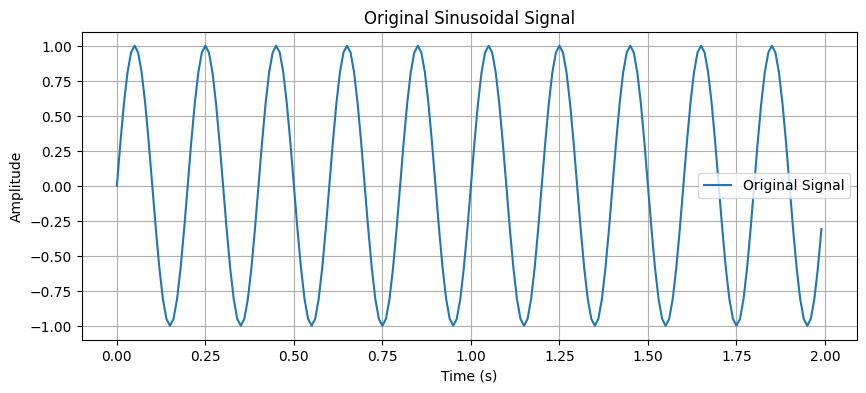

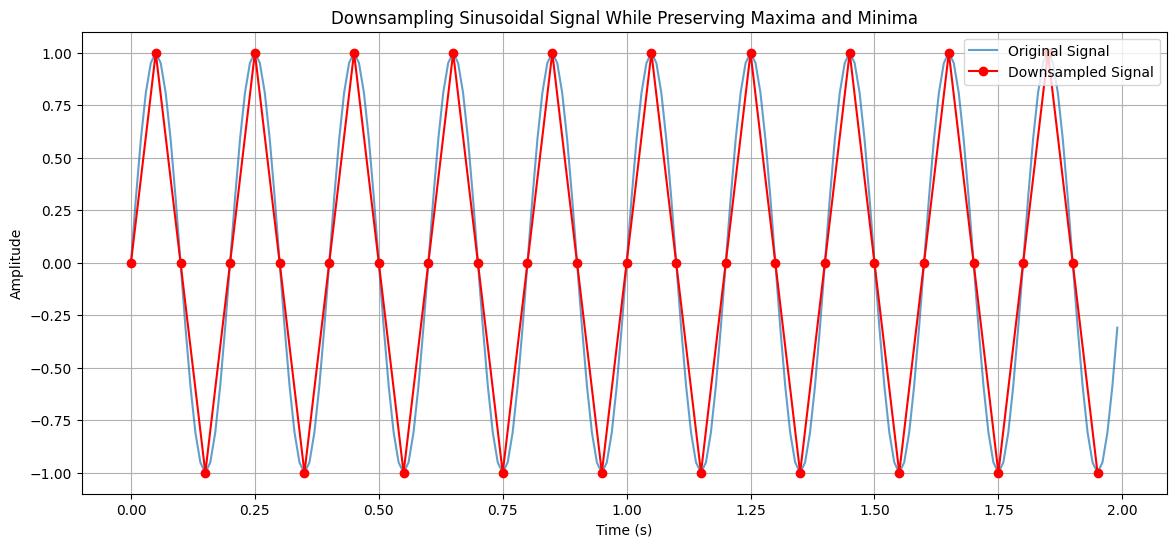

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def downsample_signal(signal, sampling_factor=5):  # noqa: ANN001, ANN201
    """
    Downsamples a sinusoidal signal while preserving all maximum and minimum points.

    :param signal: NumPy array representing the original sinusoidal signal.
    :param sampling_factor: Integer factor by which to downsample the signal.
    :return: NumPy array representing the downsampled signal.
    """  # noqa: D212
    # מציאת נקודות מקסימום ומינימום
    maxima_indices = (np.diff(np.sign(np.diff(signal))) < 0).nonzero()[0] + 1
    minima_indices = (np.diff(np.sign(np.diff(signal))) > 0).nonzero()[0] + 1

    # איחוד נקודות מקסימום ומינימום
    critical_indices = np.unique(np.concatenate((maxima_indices, minima_indices)))

    # יצירת מערך חדש עם דגימות כל 5 נתונים ושמירה על נקודות קריטיות
    downsampled_indices = np.arange(0, len(signal), sampling_factor)
    downsampled_indices = np.union1d(downsampled_indices, critical_indices)
    downsampled_indices = np.sort(downsampled_indices)

    # יצירת האות המדגם
    downsampled_signal = signal[downsampled_indices]

    return downsampled_signal  # noqa: RET504


# יצירת אות סינוסואידלי
frequency = 5  # 5Hz
sampling_interval = 0.01  # 0.01 שניות
duration = 2  # 2 שניות
t = np.arange(0, duration, sampling_interval)
original_signal = np.sin(2 * np.pi * frequency * t)

# הצגת האות המקורי
plt.figure(figsize=(10, 4))
plt.plot(t, original_signal, label="Original Signal")
plt.title("Original Sinusoidal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)  # noqa: FBT003
plt.show()

# ביצוע הדגימה
downsampled_signal = downsample_signal(original_signal, sampling_factor=5)

# יצירת מערך הזמן עבור האות המדגם
downsampled_time = t[::5]

# מציאת נקודות קריטיות באות המקורי
maxima_indices = (np.diff(np.sign(np.diff(original_signal))) < 0).nonzero()[0] + 1
minima_indices = (np.diff(np.sign(np.diff(original_signal))) > 0).nonzero()[0] + 1
critical_time = t[np.unique(np.concatenate((maxima_indices, minima_indices)))]
critical_signal = original_signal[np.unique(np.concatenate((maxima_indices, minima_indices)))]

# איחוד הדגימות עם נקודות קריטיות
downsampled_time = np.union1d(downsampled_time, critical_time)
downsampled_time = np.sort(downsampled_time)
downsampled_signal = original_signal[np.searchsorted(t, downsampled_time)]

# הצגת האות המדגם
plt.figure(figsize=(14, 6))
plt.plot(t, original_signal, label="Original Signal", alpha=0.7)
plt.plot(downsampled_time, downsampled_signal, "o-", label="Downsampled Signal", color="red")
plt.title("Downsampling Sinusoidal Signal While Preserving Maxima and Minima")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)  # noqa: FBT003
plt.show()


Q2 


Import

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Dataset upload

In [4]:


# נתיב מוחלט עם סלאשים קדמיים
df = pd.read_csv(r"C:\\advanced ptyhon course\laptop_price - dataset.csv")  # noqa: PD901

# הצגת חמשת השורות הראשונות
print(df.head())  # noqa: T201


  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

Tasks execution

a. גרף המחירים לפי מספר מחשבים ניידים:

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df["price"], marker="o", linestyle="-", markersize=3)
plt.title("prices of all the computers")
plt.xlabel("number of cumputer")
plt.ylabel("price (Euro)")
plt.grid(True)  # noqa: FBT003
plt.show()


KeyError: 'price'

<Figure size 1000x600 with 0 Axes>

b.  יצירת גרף התפלגות המחירים לפי מערכת הפעלה:

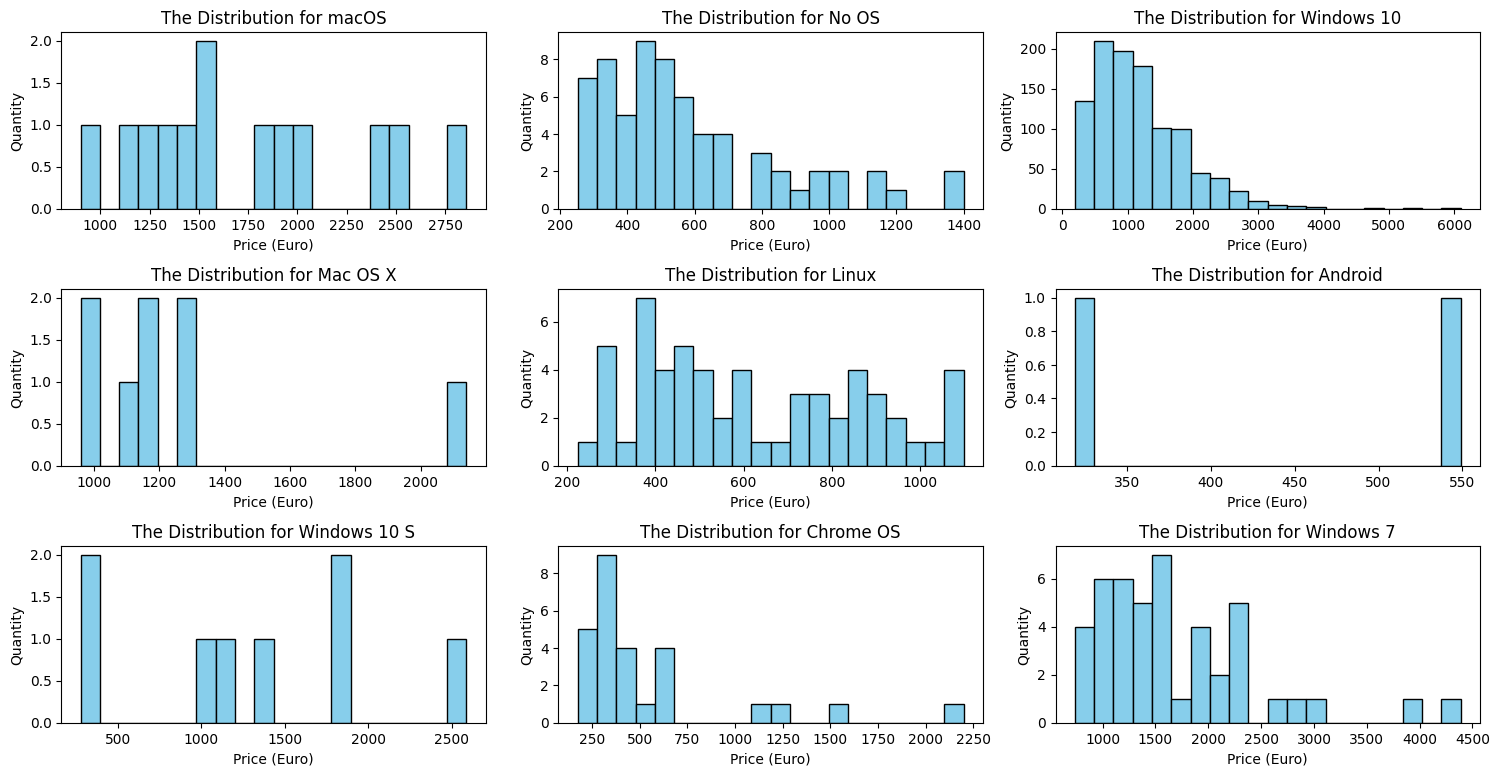

In [84]:
# קבלת מערכות הפעלה ייחודיות
unique_os = df["opsys"].unique()

# הגדרת מספר תת-גרפים לפי מספר מערכות ההפעלה
num_os = len(unique_os)
plt.figure(figsize=(15, 10))

for i, os in enumerate(unique_os, 1):
    plt.subplot((num_os // 3) + 1, 3, i)  # סדרת תת-גרפים
    subset = df[df["opsys"] == os]
    plt.hist(subset["price"], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"The Distribution for {os}")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Quantity")

plt.tight_layout()
plt.show()


c. מצא את סוגי מערכות ההפעלה השונות בקולום "OpSys" ותיקן אותם כך שיהיו אחידים:

בדוק את הערכים הייחודיים בעמודת opsys:1. 

In [ ]:
# קבלת מערכות הפעלה ייחודיות
unique_os = df["opsys"].unique()
print("מערכות הפעלה ייחודיות לפני יישור:")  # noqa: T201
print(unique_os)  # noqa: T201


מערכות הפעלה ייחודיות לפני יישור:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


2. יישור ושינוי שמות מערכות ההפעלה:

In [ ]:
# יישור שמות מערכות ההפעלה
df["opsys"] = df["opsys"].str.lower().str.strip()

# הדפסת מערכות הפעלה לאחר יישור
unique_os = df["opsys"].unique()
print("מערכות הפעלה ייחודיות לאחר יישור:")  # noqa: T201
print(unique_os)  # noqa: T201


מערכות הפעלה ייחודיות לאחר יישור:
['macos' 'no os' 'windows 10' 'mac os x' 'linux' 'android' 'windows 10 s'
 'chrome os' 'windows 7']


3. מיפוי שמות דומים למערכת הפעלה אחידה:

In [92]:
# הגדרת מיפוי לשמות אחידים
os_mapping = {
    "windows 10": "windows",
    "windows 8": "windows",
    "windows 7": "windows",
    "mac os x": "macos",
    "macos": "macos",
    "ubuntu": "linux",
    "linux": "linux",
    # הוסף כאן מיפויים נוספים לפי הצורך
}

# החל את המיפוי
df["opsys"] = df["opsys"].map(os_mapping).fillna(df["opsys"])

# הדפסת מערכות הפעלה לאחר מיפוי
unique_os = df["opsys"].unique()
print("מערכות הפעלה ייחודיות לאחר מיפוי:")
print(unique_os)


מערכות הפעלה ייחודיות לאחר מיפוי:
['macos' 'no os' 'windows' 'linux' 'android' 'windows 10 s' 'chrome os']


d. יצירת גרף התפלגות מחירים לכל סוג מערכת הפעלה

1. וודא שמערכות ההפעלה אחידות:

In [93]:
unique_os = df["opsys"].unique()
print("מערכות הפעלה ייחודיות לאחר יישור ומיפוי:")
print(unique_os)


מערכות הפעלה ייחודיות לאחר יישור ומיפוי:
['macos' 'no os' 'windows' 'linux' 'android' 'windows 10 s' 'chrome os']


2.צייר היסטוגרמות לכל מערכת הפעלה:

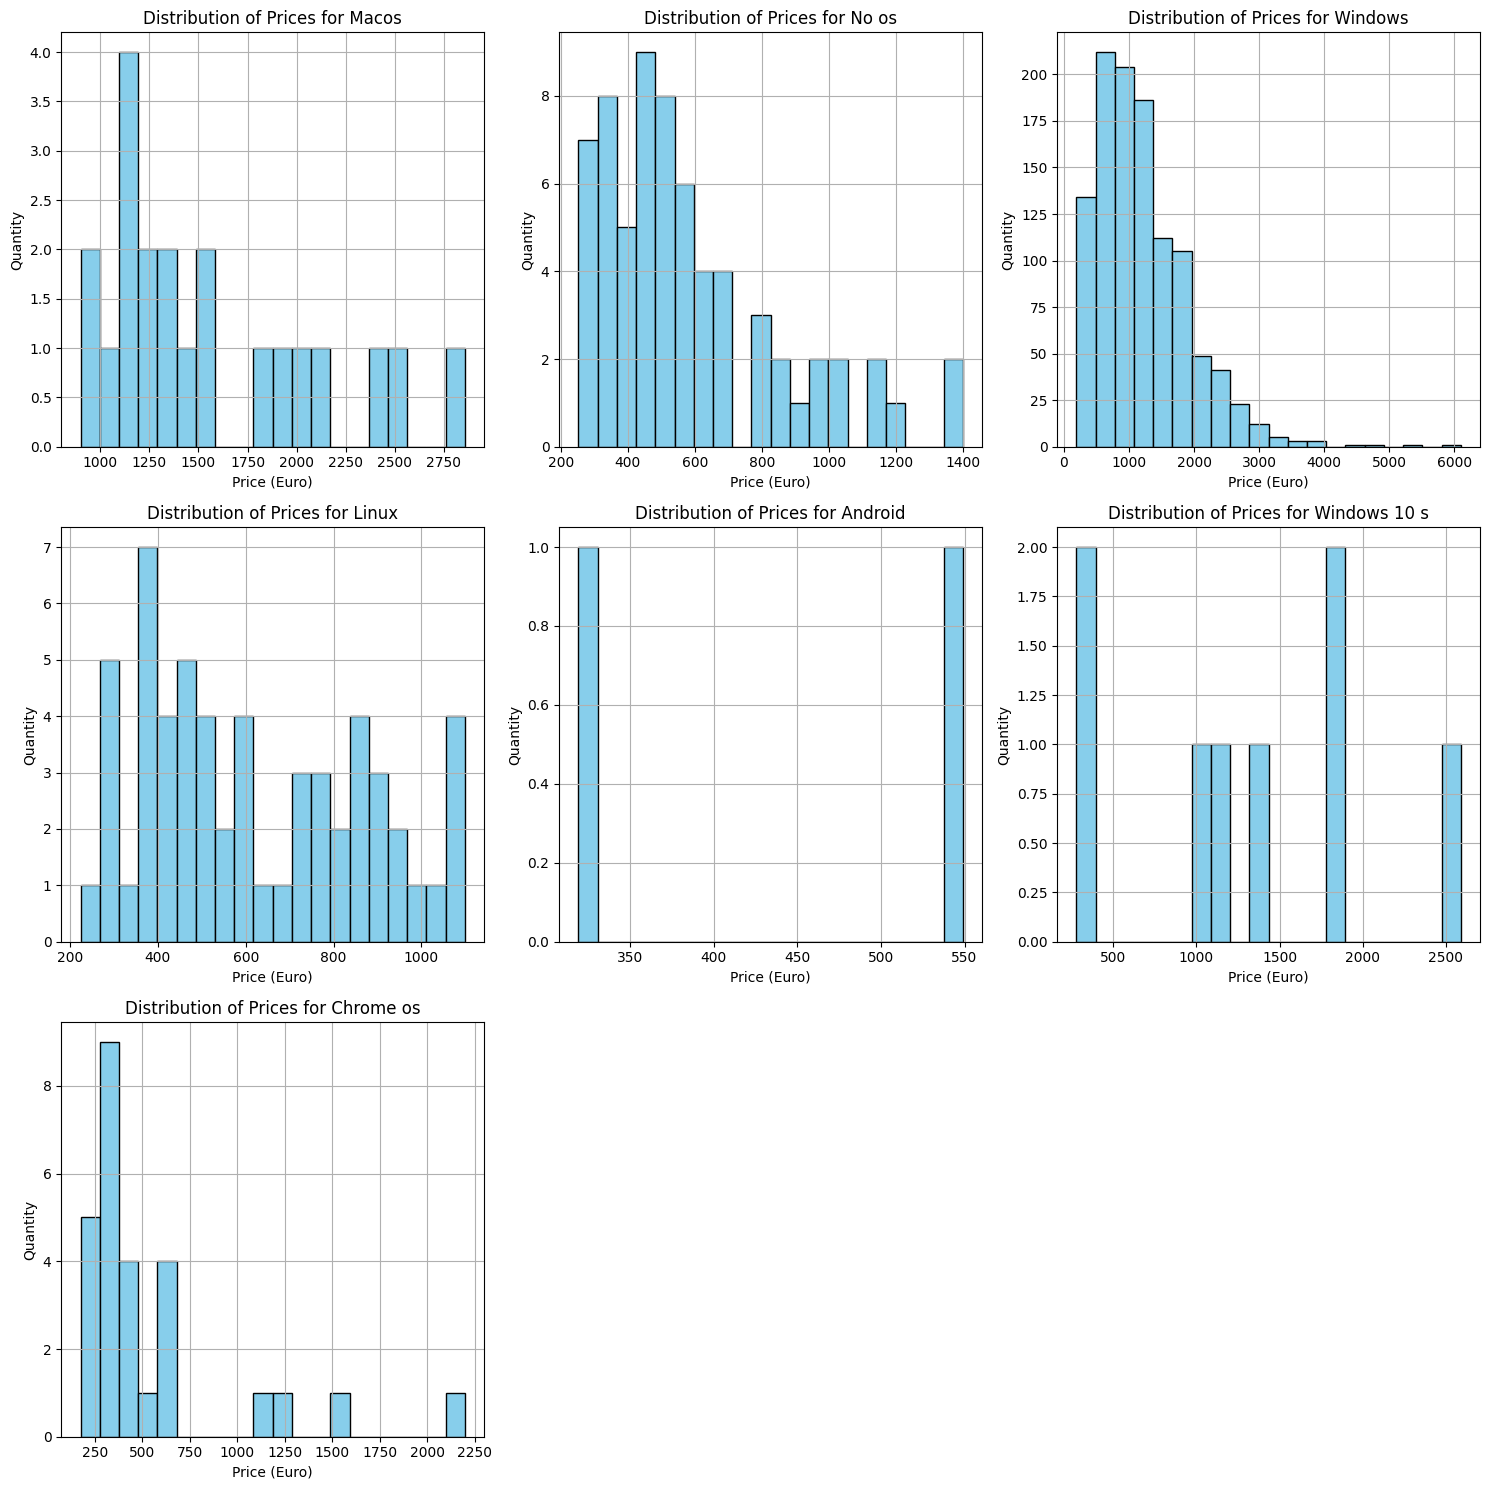

In [94]:
import matplotlib.pyplot as plt
import math

# קבלת מערכות הפעלה ייחודיות
unique_os = df["opsys"].unique()
num_os = len(unique_os)

# הגדרת מספר שורות ועמודות לתת-גרפים
num_cols = 3
num_rows = math.ceil(num_os / num_cols)

plt.figure(figsize=(15, 5 * num_rows))  # התאמת הגודל לפי מספר תת-גרפים

for i, os in enumerate(unique_os, 1):
    plt.subplot(num_rows, num_cols, i)
    subset = df[df["opsys"] == os]
    plt.hist(subset["price"], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of Prices for {os.capitalize()}")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Quantity")
    plt.grid(True)

plt.tight_layout()
plt.show()


E. חקר הקשר בין RAM למחיר המחשב


1. וודא שסוג הנתונים של RAM ו-Price הוא מספרי:

In [95]:
# המרת עמודות 'ram' ו-'price' למספרים
df["ram"] = pd.to_numeric(df["ram"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# הסרת שורות עם ערכים חסרים בעמודות 'ram' ו-'price'
df = df.dropna(subset=["ram", "price"])

# בדיקת סוג הנתונים
print(df[["ram", "price"]].dtypes)


ram        int64
price    float64
dtype: object


2. צייר גרף פיזור (Scatter Plot) לבחינת הקשר בין RAM למחיר:

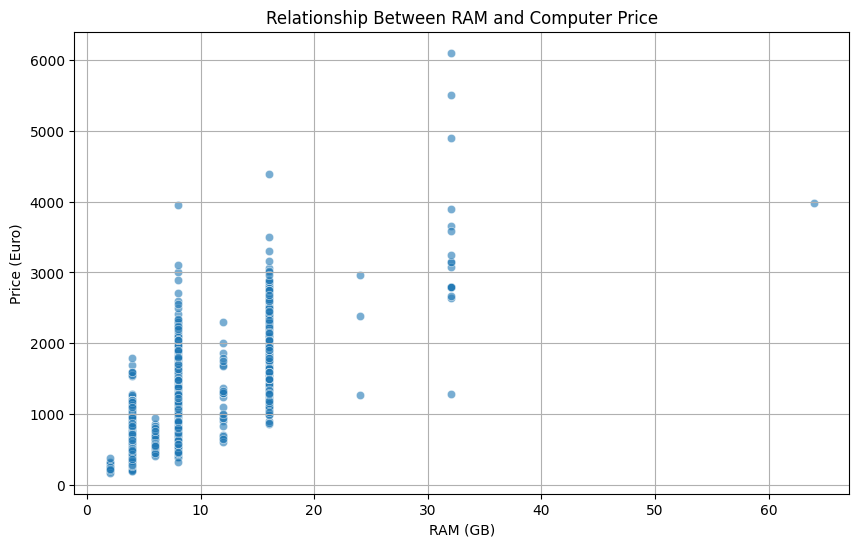

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(df["ram"], df["price"], alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Relationship Between RAM and Computer Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euro)")
plt.grid(True)
plt.show()


חישוב ומתן הערכת קשר סטטיסטי (אופציונלי): 3

In [97]:
correlation = df["ram"].corr(df["price"])
print(f"Pearson correlation coefficient between RAM and Price: {correlation:.2f}")


Pearson correlation coefficient between RAM and Price: 0.74


F.יצירת עמודה חדשה "Storage type" מתוך העמודה "Memory"

בדוק דוגמאות לעמודת "memory":1

In [98]:
print(df["memory"].head())


0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
Name: memory, dtype: object


2.יצירת עמודה חדשה "storage_type" על ידי חילוץ סוג האחסון:


In [99]:
# יצירת עמודה חדשה 'storage_type'
df["storage_type"] = df["memory"].str.extract(r"(\bSSD\b|\bHDD\b)", expand=False)

# בדיקת הערכים החדשים
print(df[["memory", "storage_type"]].head())


                memory storage_type
0            128GB SSD          SSD
1  128GB Flash Storage          NaN
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD


3. טיפול במקרים בהם סוג האחסון לא נלמד:

In [100]:
# הרחבת regex לשמות אחסון נוספים אם יש
df["storage_type"] = df["memory"].str.extract(r"(\bSSD\b|\bHDD\b|\bNVMe\b|\beMMC\b)", expand=False)

# מילוי ערכים חסרים עם 'Other' או ערך מתאים
df["storage_type"] = df["storage_type"].fillna("Other")

# בדיקת הערכים החדשים
print(df[["memory", "storage_type"]].head())


                memory storage_type
0            128GB SSD          SSD
1  128GB Flash Storage        Other
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD


4. הבטחת אחידות ב-"storage_type"

In [101]:
df["storage_type"] = df["storage_type"].str.upper()
print(df["storage_type"].unique())


['SSD' 'OTHER' 'HDD']


G. הדגמת כל הפתרונות עם קוד מלא

הדאטהסט נטען בהצלחה.
שמות העמודות בדאטהפריים:
Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

שמות העמודות לאחר ניקוי:
Index(['company', 'product', 'typename', 'inches', 'screenresolution',
       'cpu_company', 'cpu_type', 'cpu_frequency', 'ram', 'memory',
       'gpu_company', 'gpu_type', 'opsys', 'weight', 'price_euro'],
      dtype='object')

שמות העמודות לאחר שינוי:
Index(['company', 'product', 'typename', 'inches', 'screenresolution',
       'cpu_company', 'cpu_type', 'cpu_frequency', 'ram', 'memory',
       'gpu_company', 'gpu_type', 'opsys', 'weight', 'price'],
      dtype='object')

חמשת השורות הראשונות בדאטהפריים:
  company      product   typename  inches                    screenresolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Ap

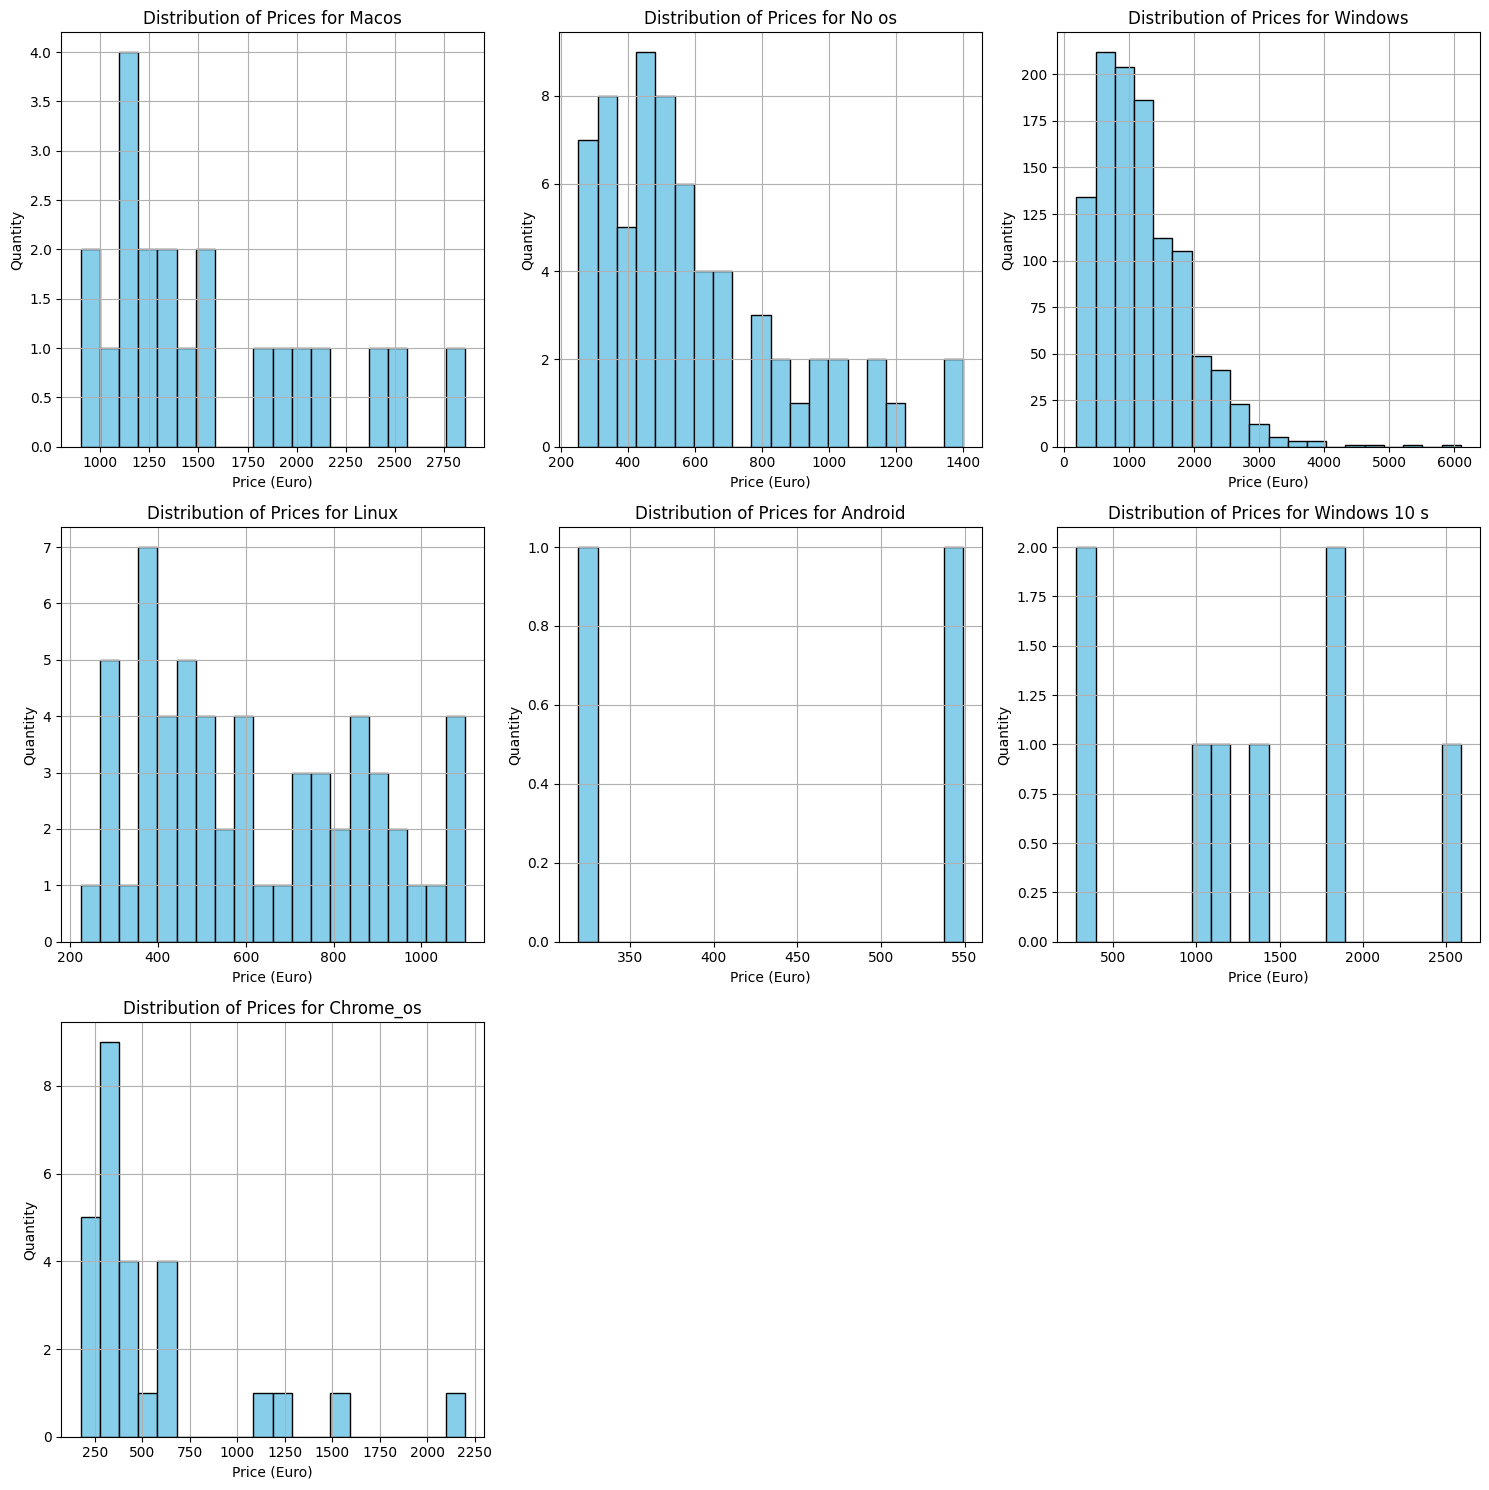


מידע על הדאטהפריים לאחר המרת עמודות 'ram' ו-'price':
ram        int64
price    float64
dtype: object


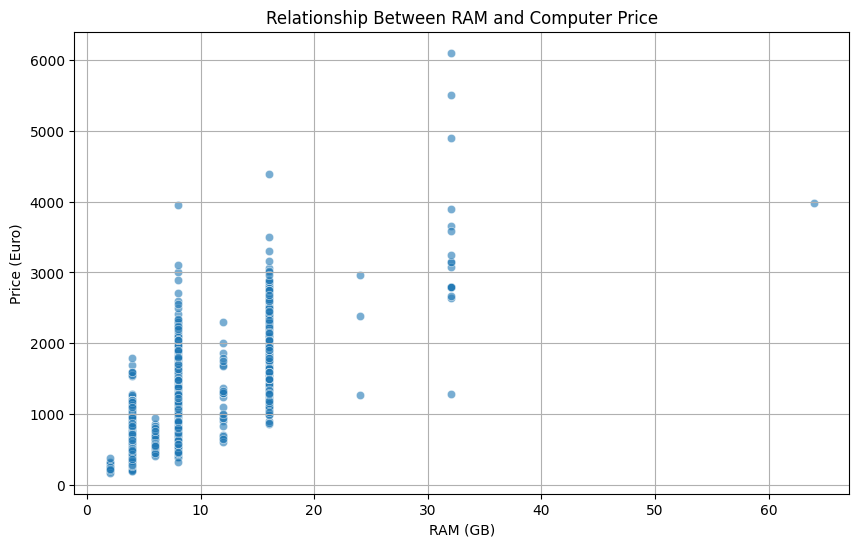

Pearson correlation coefficient between RAM and Price: 0.74

דוגמאות לעמודת 'memory':
0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
Name: memory, dtype: object

חמשת השורות הראשונות עם 'storage_type':
                memory storage_type
0            128GB SSD          SSD
1  128GB Flash Storage        OTHER
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD


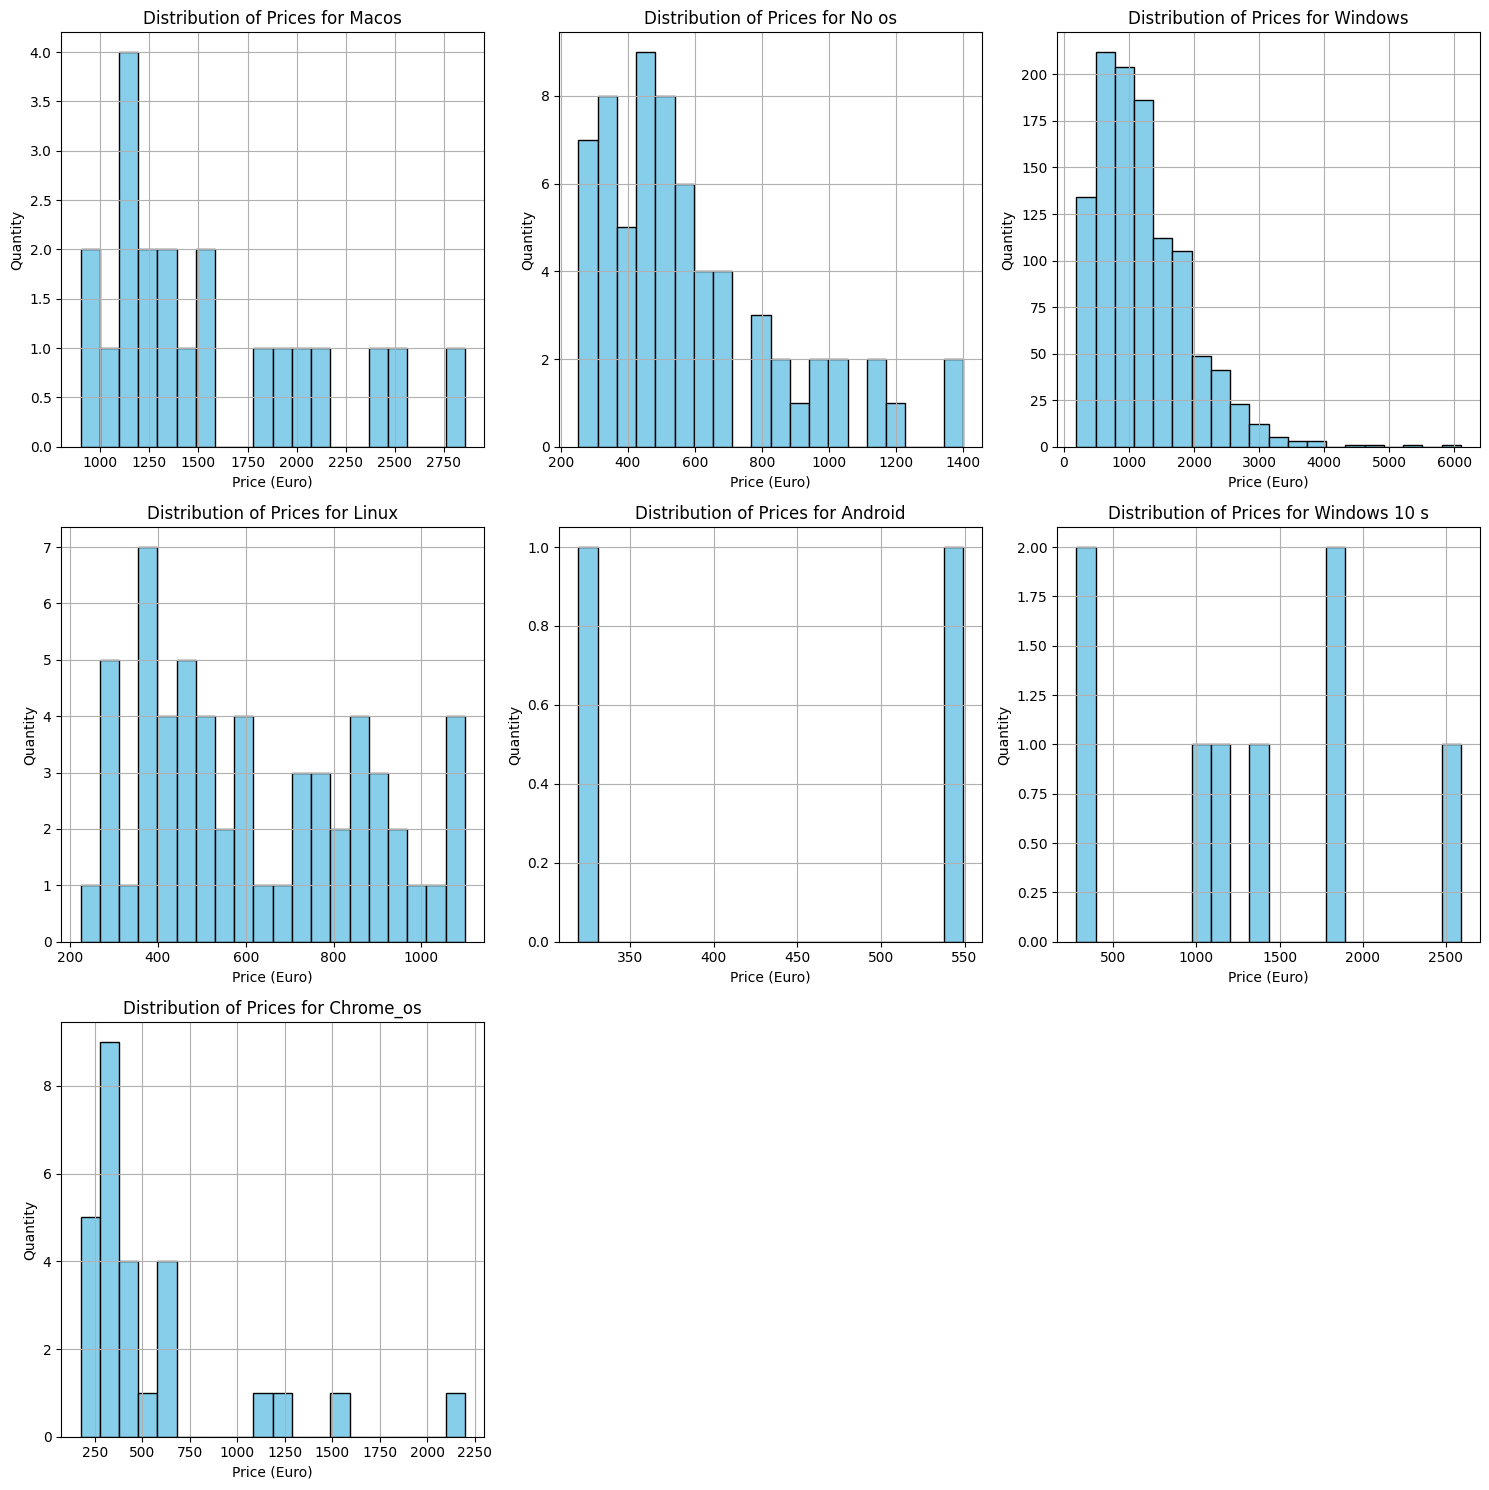

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# הגדרת נתיב הקובץ
file_path = r"C:\\advanced ptyhon course\laptop_price - dataset.csv"  # השתמש בסלאשים קדמיים

# בדיקת קיום הקובץ
if not os.path.exists(file_path):
    print(f"לא נמצא קובץ בנתיב: {file_path}")
else:
    # טעינת הדאטהסט
    try:
        df = pd.read_csv(file_path)
        print("הדאטהסט נטען בהצלחה.")
    except pd.errors.ParserError:
        print(f"שגיאה בקריאת הקובץ: {file_path}")
    except Exception as e:
        print(f"אירעה שגיאה: {e}")

    # בדיקת שמות העמודות
    print("שמות העמודות בדאטהפריים:")
    print(df.columns)

    # ניקוי ושינוי שמות העמודות
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" (ghz)", "", regex=False)
        .str.replace(" (gb)", "", regex=False)
        .str.replace(" (kg)", "", regex=False)
        .str.replace(" ", "_", regex=False)
        .str.replace("(", "", regex=False)
        .str.replace(")", "", regex=False)
        .str.replace("-", "_", regex=False)
    )
    print("\nשמות העמודות לאחר ניקוי:")
    print(df.columns)

    # שינוי שם העמודה 'price_euro' ל'price'
    df = df.rename(columns={"price_euro": "price"})
    print("\nשמות העמודות לאחר שינוי:")
    print(df.columns)

    # ניקוי שמות החברות
    if "company" in df.columns:
        df["company"] = df["company"].str.strip().str.capitalize()

    # הדפסת חמשת השורות הראשונות
    print("\nחמשת השורות הראשונות בדאטהפריים:")
    print(df.head())

    # בדיקה אם העמודות 'price' ו-'opsys' קיימות
    if "price" in df.columns and "opsys" in df.columns:
        print("העמודות 'price' ו-'opsys' קיימות בדאטהפריים.")

        # Task 1: מציאת מערכות הפעלה ייחודיות ויישור שמות
        unique_os_before = df["opsys"].unique()
        print("\nמערכות הפעלה ייחודיות לפני יישור:")
        print(unique_os_before)

        # יישור ושינוי שמות מערכות הפעלה
        df["opsys"] = df["opsys"].str.lower().str.strip()

        # מיפוי שמות מערכות הפעלה לאחידים
        os_mapping = {
            "windows 10": "windows",
            "windows 8": "windows",
            "windows 7": "windows",
            "windows10": "windows",
            "mac os x": "macos",
            "macos": "macos",
            "ubuntu": "linux",
            "linux": "linux",
            "chrome os": "chrome_os",
            # הוסף כאן מיפויים נוספים לפי הצורך
        }
        df["opsys"] = df["opsys"].map(os_mapping).fillna(df["opsys"])

        unique_os_after = df["opsys"].unique()
        print("\nמערכות הפעלה ייחודיות לאחר יישור ומיפוי:")
        print(unique_os_after)

        # Task 2: יצירת גרף התפלגות מחירים לכל מערכת הפעלה
        num_os = len(unique_os_after)
        num_cols = 3
        num_rows = math.ceil(num_os / num_cols)

        plt.figure(figsize=(15, 5 * num_rows))

        for i, os in enumerate(unique_os_after, 1):
            plt.subplot(num_rows, num_cols, i)
            subset = df[df["opsys"] == os]
            plt.hist(subset["price"], bins=20, color="skyblue", edgecolor="black")
            plt.title(f"Distribution of Prices for {os.capitalize()}")
            plt.xlabel("Price (Euro)")
            plt.ylabel("Quantity")
            plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Task 3: חקר הקשר בין RAM למחיר
        # המרת עמודות 'ram' ו-'price' למספרים
        df["ram"] = pd.to_numeric(df["ram"], errors="coerce")
        df["price"] = pd.to_numeric(df["price"], errors="coerce")

        # הסרת שורות עם ערכים חסרים בעמודות 'ram' ו-'price'
        df = df.dropna(subset=["ram", "price"])

        # בדיקת סוג הנתונים
        print("\nמידע על הדאטהפריים לאחר המרת עמודות 'ram' ו-'price':")
        print(df[["ram", "price"]].dtypes)

        # גרף פיזור לבחינת הקשר בין RAM למחיר
        plt.figure(figsize=(10, 6))
        plt.scatter(df["ram"], df["price"], alpha=0.6, edgecolors="w", linewidth=0.5)
        plt.title("Relationship Between RAM and Computer Price")
        plt.xlabel("RAM (GB)")
        plt.ylabel("Price (Euro)")
        plt.grid(True)
        plt.show()

        # חישוב מקדם המתאם
        correlation = df["ram"].corr(df["price"])
        print(f"Pearson correlation coefficient between RAM and Price: {correlation:.2f}")

        # Task 4: יצירת עמודה חדשה "storage_type" מתוך "memory"
        # בדיקת דוגמאות לעמודת 'memory'
        print("\nדוגמאות לעמודת 'memory':")
        print(df["memory"].head())

        # יצירת עמודה חדשה 'storage_type' על ידי חילוץ סוג האחסון
        df["storage_type"] = df["memory"].str.extract(r"(\bSSD\b|\bHDD\b|\bNVMe\b|\beMMC\b)", expand=False)

        # מילוי ערכים חסרים עם 'Other'
        df["storage_type"] = df["storage_type"].fillna("Other")

        # המרת סוג האחסון לאותיות גדולות
        df["storage_type"] = df["storage_type"].str.upper()

        # בדיקת העמודה החדשה
        print("\nחמשת השורות הראשונות עם 'storage_type':")
        print(df[["memory", "storage_type"]].head())

        # Task 5: יצירת גרף התפלגות מחירים לפי מערכת הפעלה
        unique_os = df["opsys"].unique()
        num_os = len(unique_os)
        num_cols = 3
        num_rows = math.ceil(num_os / num_cols)

        plt.figure(figsize=(15, 5 * num_rows))

        for i, os in enumerate(unique_os, 1):
            plt.subplot(num_rows, num_cols, i)
            subset = df[df["opsys"] == os]
            plt.hist(subset["price"], bins=20, color="skyblue", edgecolor="black")
            plt.title(f"Distribution of Prices for {os.capitalize()}")
            plt.xlabel("Price (Euro)")
            plt.ylabel("Quantity")
            plt.grid(True)

        plt.tight_layout()
        plt.show()

    else:
        missing_columns = []
        if "price" not in df.columns:
            missing_columns.append("price")
        if "opsys" not in df.columns:
            missing_columns.append("opsys")
        print(f"העמודות הבאות לא נמצאות בדאטהפריים: {', '.join(missing_columns)}. אנא בדוק את שמות העמודות.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1275 non-null   object 
 1   product           1275 non-null   object 
 2   typename          1275 non-null   object 
 3   inches            1275 non-null   float64
 4   screenresolution  1275 non-null   object 
 5   cpu_company       1275 non-null   object 
 6   cpu_type          1275 non-null   object 
 7   cpu_frequency     1275 non-null   float64
 8   ram               1275 non-null   int64  
 9   memory            1275 non-null   object 
 10  gpu_company       1275 non-null   object 
 11  gpu_type          1275 non-null   object 
 12  opsys             1275 non-null   object 
 13  weight            1275 non-null   float64
 14  price             1275 non-null   float64
 15  storage_type      1275 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory

C:\Users\Matan\AppData\Local\Temp\ipykernel_18124\1700335849.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Operating System')


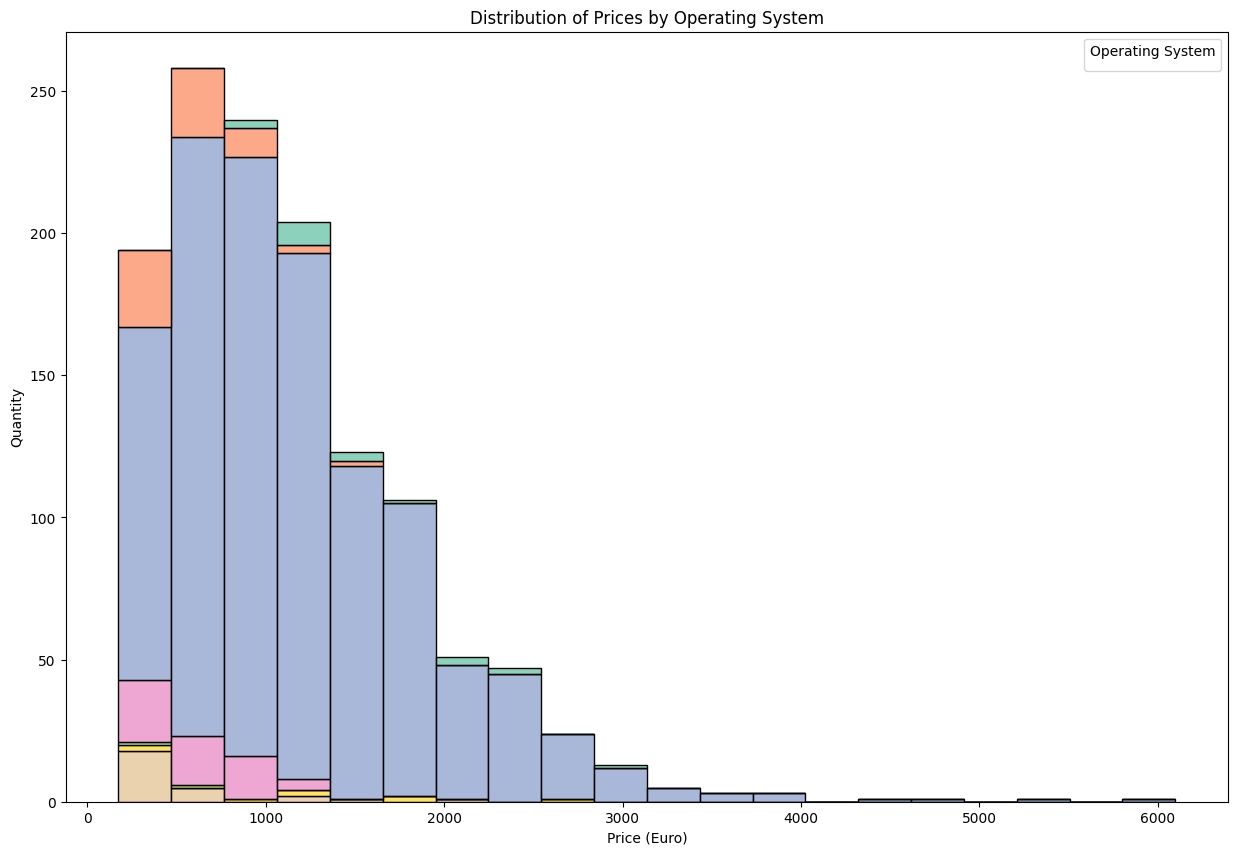

In [105]:
print(df.info())
df["ram"] = pd.to_numeric(df["ram"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df = df.dropna(subset=["ram", "price", "opsys", "storage_type"])

import seaborn as sns

# גרף התפלגות מחירים לפי מערכת הפעלה באמצעות Seaborn
plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='price', hue='opsys', multiple='stack', palette='Set2', bins=20)
plt.title('Distribution of Prices by Operating System')
plt.xlabel('Price (Euro)')
plt.ylabel('Quantity')
plt.legend(title='Operating System')
plt.show()

בונוס

האם יש קשר בין גודל המסך (Screen Size) למחיר המחשב?

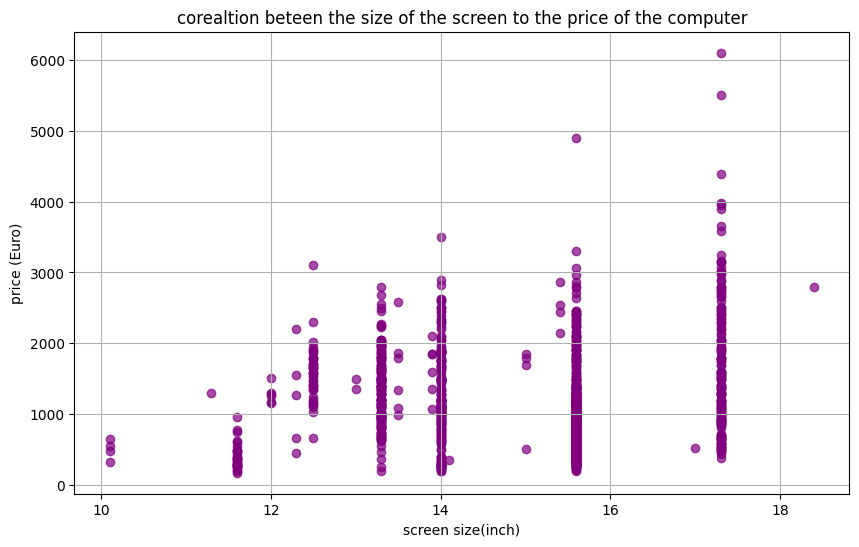

המתאם בין גודל המסך למחיר הוא: 0.07


In [108]:
import matplotlib.pyplot as plt

# בדיקת קשר בין גודל המסך למחיר המחשב
plt.figure(figsize=(10, 6))
plt.scatter(df["inches"], df["price"], alpha=0.7, color="purple")
plt.title("corealtion beteen the size of the screen to the price of the computer")
plt.xlabel("screen size(inch)")
plt.ylabel("price (Euro)")
plt.grid(True)
plt.show()

# חישוב מקדם המתאם בין גודל המסך למחיר
correlation_screen_price = df["inches"].corr(df["price"])
print(f"המתאם בין גודל המסך למחיר הוא: {correlation_screen_price:.2f}")


איזה סוגי זיכרון (RAM) נפוצים ביותר בשוק המחשבים הניידים?

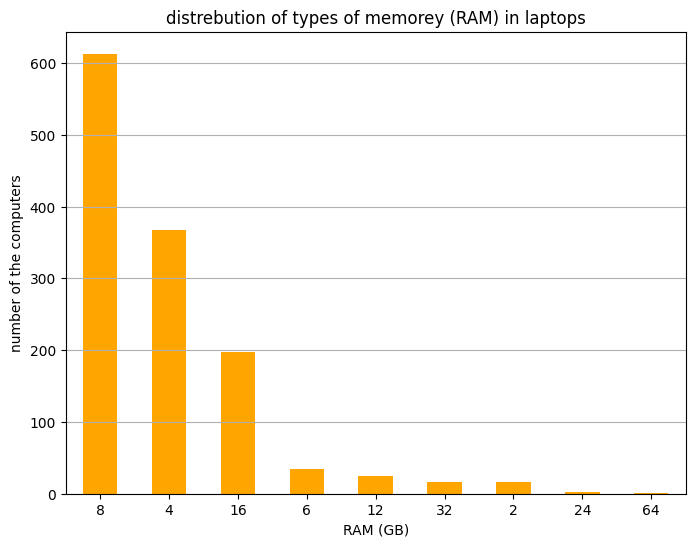

סוגי הזיכרון הנפוצים ביותר:
ram
8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64


In [111]:
import matplotlib.pyplot as plt

# קבלת הפצת סוגי הזיכרון (RAM)
plt.figure(figsize=(8, 6))
ram_counts = df["ram"].value_counts()
ram_counts.plot(kind="bar", color="orange")
plt.title("distrebution of types of memorey (RAM) in laptops")
plt.xlabel("RAM (GB)")
plt.ylabel("number of the computers")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

# הצגת סוגי הזיכרון הנפוצים ביותר
print("סוגי הזיכרון הנפוצים ביותר:")
print(ram_counts)
